# matrix Tranformation

In [1]:
import numpy as np
from sklearn.decomposition import TruncatedSVD   # used to reduce the dimensionality of high-dimensional data. 

# Prepare the matrix
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])   #a matrix with 4 rows and 3 columns.

# Apply the transformation using SVD
svd = TruncatedSVD(n_components=2)
X_transformed = svd.fit_transform(X)

# Display the transformed matrix
print("Transformed Matrix:")
print(X_transformed)


Transformed Matrix:
[[ 3.58705934  1.06442721]
 [ 8.75770068  0.55016253]
 [13.92834202  0.03589786]
 [19.09898335 -0.47836682]]


# image reconstruction using SVD

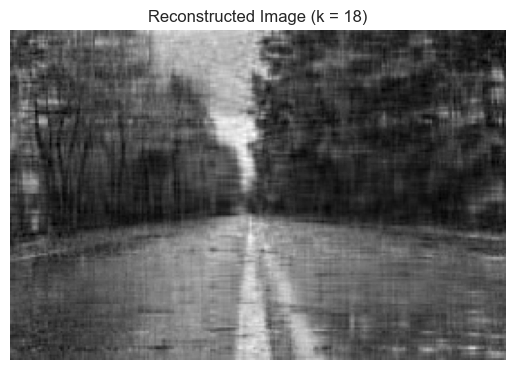

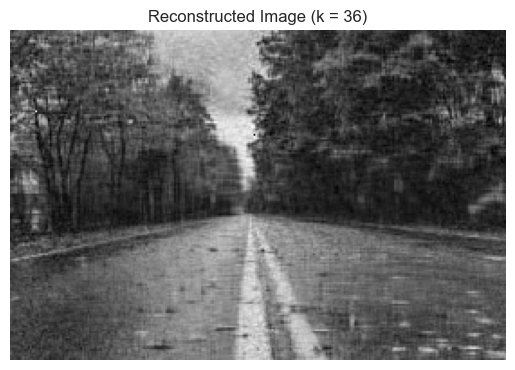

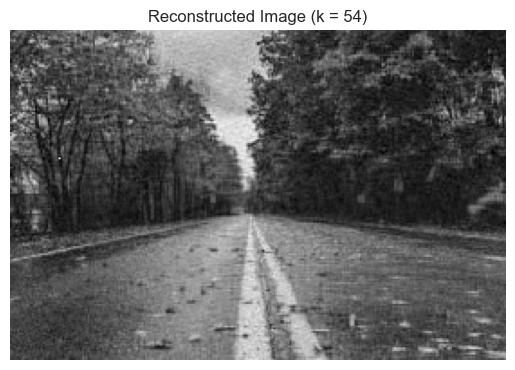

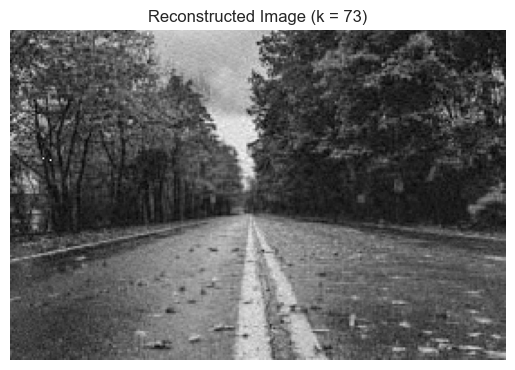

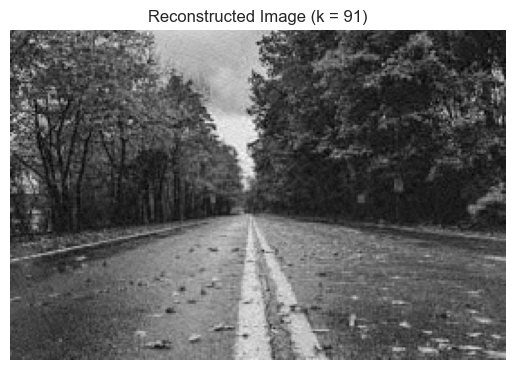

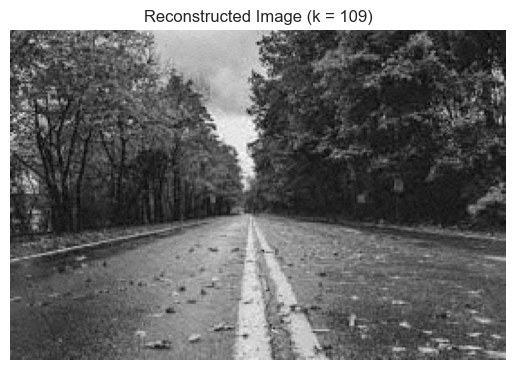

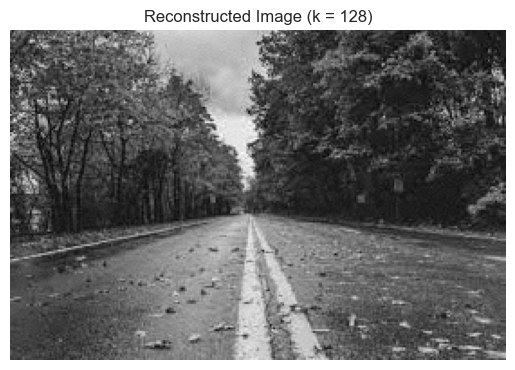

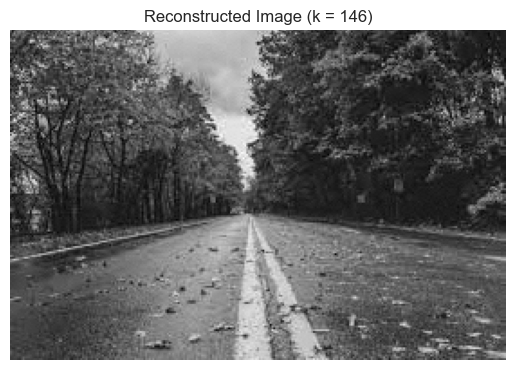

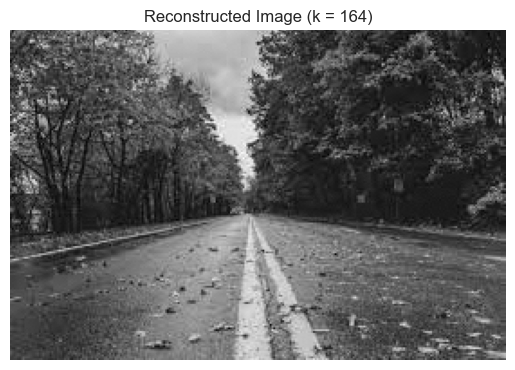

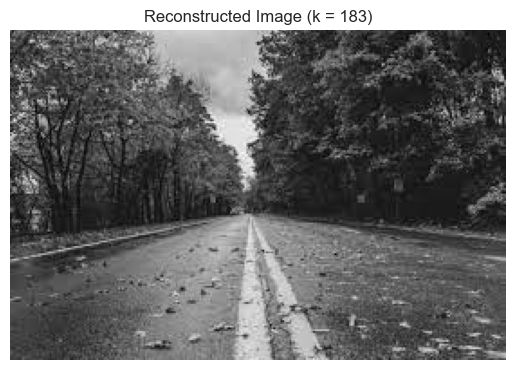

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Load the image
image_path = 'C:/Users/KISHAN PARSOYA/Downloads/1234.jpeg'  # Replace with the path to your image file
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_matrix = np.array(image)

# Perform SVD
U, sigma, Vt = np.linalg.svd(image_matrix)

# Set the number of singular values to retain for reconstruction
max_k = min(image_matrix.shape)  # Maximum possible value of k
num_iterations = 10  # Number of iterations for gradual reconstruction

# Set the Seaborn style
sns.set(style='whitegrid')

# Iterate over different numbers of singular values
for i in range(num_iterations):
    k = int(max_k * (i + 1) / num_iterations)  # Gradually increase k

    # Truncate the matrices
    U_truncated = U[:, :k]
    sigma_truncated = np.diag(sigma[:k])
    Vt_truncated = Vt[:k, :]

    # Reconstruct the image
    reconstructed_image_matrix = U_truncated @ sigma_truncated @ Vt_truncated

    # Convert the reconstructed matrix back to image format
    reconstructed_image = Image.fromarray(reconstructed_image_matrix.astype(np.uint8))

    # Display the reconstructed image
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (k = {k})')
    plt.axis('off')
    plt.show()


# SVD on Dataset

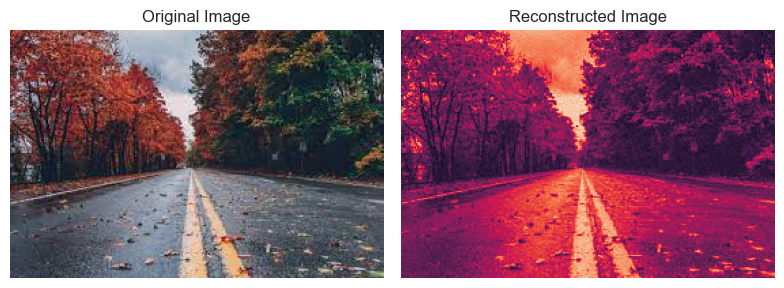

In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Step 1: Load and preprocess the dataset
image_path = 'C:/Users/KISHAN PARSOYA/Downloads/1234.jpeg'  # Replace with the path to your image
image = Image.open(image_path)
grayscale_image = image.convert('L')  # Convert the image to grayscale
dataset = np.array(grayscale_image)

# Step 2: Perform SVD on the dataset
svd = TruncatedSVD(n_components=100)  # Choose the desired number of components
svd.fit(dataset)

# Step 3: Examine the SVD components
U = svd.transform(dataset)
V = svd.components_
explained_variance = svd.explained_variance_ratio_

# Step 4: Reconstruct the original image using the SVD components
reconstructed_dataset = U @ V
reconstructed_image = Image.fromarray(reconstructed_dataset.astype(np.uint8))

# Step 5: Display the original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()
